data_feature_size = (506, 13)
target size =(506,)
projected data = (506, 2)
first two principal direction is:
[[-0.24959319 -0.31318631]
 [ 0.25652131 -0.32130825]
 [-0.3468611   0.11181554]
 [-0.005099    0.45672596]
 [-0.34297566  0.21985693]
 [ 0.18943673  0.15387677]
 [-0.31385097  0.31174761]
 [ 0.32173451 -0.34918069]
 [-0.31981745 -0.2703984 ]
 [-0.33853899 -0.23885931]
 [-0.20502118 -0.30870354]
 [ 0.20273245  0.23495727]
 [-0.30984085 -0.07598235]]


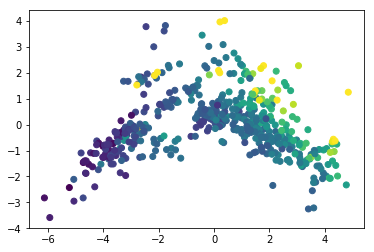

In [2]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
data, target = load_boston().data, load_boston().target
print("data_feature_size = "+str(np.shape(data)))
print("target size ="+str(np.shape(target)))
def normalize_feature(data):
    m,n = np.shape(data)
    data_processed = np.zeros((m,n))
    for i in range(n):
        mean = np.mean(data[:,i])
        var = np.std(data[:,i])
        data_processed[:,i] = (data[:,i]-mean)/var
    return data_processed

#do normalization:
data_processed = normalize_feature(data)
#print(np.shape(data_processed))

def PCA_me(data_processed):
    N,M= np.shape(data_processed)
    covariance = 1/N* data_processed.T@data_processed
    U, s, V = np.linalg.svd(covariance, full_matrices=True)
    return U

pca_me = PCA_me(data_processed)
projection = data_processed@pca_me[:,0:2]
print("projected data = "+ str(np.shape(projection)))
print("first two principal direction is:"+"\n"+str(pca_me[:,0:2]))
plt.scatter(projection[:,0],projection[:,1],c = target / max(target))




[0.47097344 0.11015872]
[[-2.09784245  0.77710171]
 [-1.45641223  0.58808833]
 [-2.07415237  0.60218543]
 ...
 [-0.31101606  1.15182721]
 [-0.26916176  1.03671761]
 [-0.1242658   0.75197455]]
(506, 2)


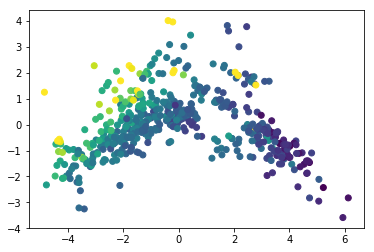

In [3]:
pca = PCA(n_components=2)
pca.fit(data_processed)
print(pca.explained_variance_ratio_)
newA=pca.transform(data_processed) 
print(newA[:,0:2])
print(np.shape(newA))
plt.scatter(newA[:,0],newA[:,1],c = target / max(target))